# TITANIC - with Keras and Deep Learning

In this project, I will apply with Keras and Deep Learning algorithms to survival datas of the sinking of Titanic. Data is taken from the Kaggle.

### Data Dictionary

* PassengerId: Unique identifier for each passenger.<br>
* Survived: Indicates whether the passenger survived or not - 0 (did not survive) or 1 (survived).<br>
* Pclass: Passenger class. 1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class.<br>
* Name: Full name of the passenger.<br>
* Sex: Passenger's gender, "male" or "female".<br>
* Age: Passenger's age.<br>
* SibSp: Number of siblings/spouses the passenger had aboard the ship.<br>
* Parch: Number of parents/children the passenger had aboard the ship.<br>
* Ticket: Passenger's ticket number.<br>
* Fare: Passenger's ticket fare.<br>
* Cabin: Passenger's cabin number.<br>
* Embarked: Port where the passenger embarked the ship, "S" (Southampton), "C" (Cherbourg) or "Q" (Queenstown).

<img src='https://miro.medium.com/v2/resize:fit:1400/1*iOCbIdKMy2I2sUsNBMES5Q.jpeg'>
<br>
<img src='https://i.guim.co.uk/img/media/5edc4d7ab8f12298d1c751e9598492219d8403f3/0_0_915_549/master/915.jpg?width=465&dpr=1&s=none'> <br>
<br>
<a href='https://www.kaggle.com/competitions/titanic' target= _blank> Can get data from this link

### Imports

In [245]:
#pip install tensorflow

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

### Get Data

In [253]:
df1 = pd.read_csv('ttrain.csv')

In [248]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [254]:
df2 = pd.read_csv('ttest.csv')  

In [250]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [255]:
df = pd.concat([df1, df2], ignore_index=True)

### EDA - Exploratory Data Analysis

In [256]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [257]:
df.Fare.mean(), df.Fare.max(), df.Fare.min(), df.Fare.median(), df.Fare.std()

(33.29547928134557, 512.3292, 0.0, 14.4542, 51.75866823917414)

In [258]:
df.Fare.value_counts()

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [260]:
# fill null value of Fare with average Fare of same Embarked and same Pclass

df.Fare.fillna(df[ (df['Embarked'] == 'S') & (df['Pclass'] == 3) ]['Fare'].mean(), inplace=True)


#df.Fare.fillna(df.Fare.mean(), inplace=True)

In [261]:
df[df["PassengerId"] == 1044]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,14.435422,NaN,S


In [262]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

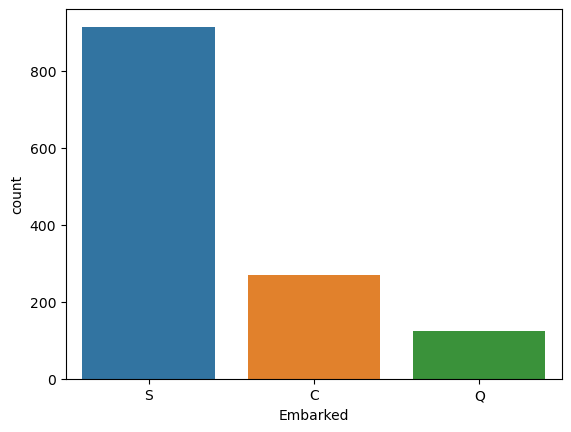

In [263]:
sns.countplot(x=df.Embarked)

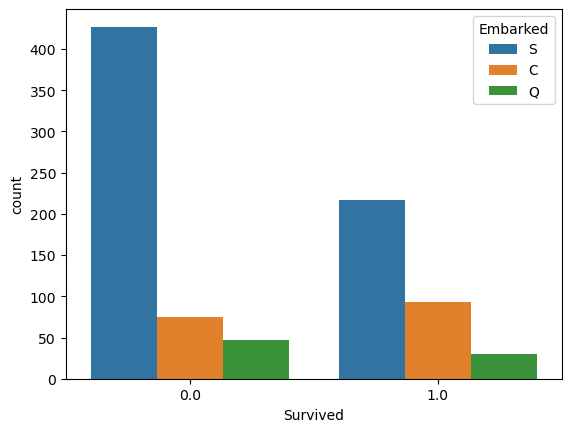

In [241]:
sns.countplot(x= 'Survived', hue = 'Embarked', data=df);

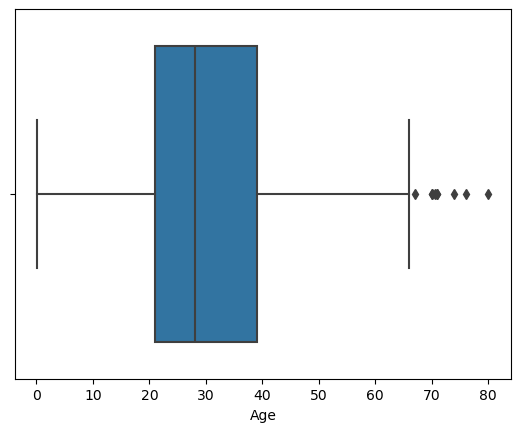

In [242]:
sns.boxplot(x = df["Age"]);

In [243]:
df["Survived"].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [265]:
df.Embarked.fillna('S', inplace=True)

In [274]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [167]:
df.shape

(1309, 12)

In [168]:
df.Cabin.value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [267]:
del df['Cabin']

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 112.6+ KB


In [171]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [269]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=True)

In [270]:
df.Title.value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [174]:
df.Title = df.Title.replace(['Ms', 'Mile','Mlle'], 'Miss')

In [175]:
df.Title = df.Title.replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')

In [176]:
df.Title = df.Title.replace(['Dr', 'Major','Col', 'Sir', 'Rev', 'Jonkheer', 'Capt', 'Don'], 'Mr')

In [271]:
df.Title.value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [272]:
df= df.drop(['Name'], axis=1)

In [273]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [278]:
df.groupby('Title')['Age'].median(), df.groupby('Title')['Age'].mean()

(Title
 Capt        70.0
 Col         54.5
 Countess    33.0
 Don         40.0
 Dona        39.0
 Dr          49.0
 Jonkheer    38.0
 Lady        48.0
 Major       48.5
 Master       4.0
 Miss        22.0
 Mlle        24.0
 Mme         24.0
 Mr          29.0
 Mrs         35.5
 Ms          28.0
 Rev         41.5
 Sir         49.0
 Name: Age, dtype: float64,
 Title
 Capt        70.000000
 Col         54.000000
 Countess    33.000000
 Don         40.000000
 Dona        39.000000
 Dr          43.571429
 Jonkheer    38.000000
 Lady        48.000000
 Major       48.500000
 Master       5.482642
 Miss        21.774238
 Mlle        24.000000
 Mme         24.000000
 Mr          32.252151
 Mrs         36.994118
 Ms          28.000000
 Rev         41.250000
 Sir         49.000000
 Name: Age, dtype: float64)

In [279]:
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))

In [280]:
df.Age.mean()

29.896894040768892

In [281]:
df[ df['Title'] == 'Master' ]['Age'].mean()

5.482641509433963

In [282]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [283]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025650,-0.055224,0.008942,0.031127
Survived,-0.005007,1.000000,-0.338481,-0.087092,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.377708,0.060832,0.018322,-0.558684
Age,0.025650,-0.087092,-0.377708,1.000000,-0.220784,-0.138532,0.169221
SibSp,-0.055224,-0.035322,0.060832,-0.220784,1.000000,0.373587,0.160350
Parch,0.008942,0.081629,0.018322,-0.138532,0.373587,1.000000,0.221635
Fare,0.031127,0.257307,-0.558684,0.169221,0.160350,0.221635,1.000000


In [284]:
del df['Ticket']

In [286]:
del df['PassengerId']

KeyError: 'PassengerId'

In [ ]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
Title            0
dtype: int64

In [287]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,Mr


In [288]:
df = pd.get_dummies(df, drop_first=True)

In [289]:
train  = df[df.Survived.notnull()]
test = df[df.Survived.isnull()].drop('Survived', axis=1)

x = train.drop(['Survived'], axis=1)
y = train[['Survived']]

In [290]:
test.shape

(418, 25)

In [291]:
df2.shape

(418, 11)

In [292]:
x.shape

(891, 25)

### Modelling

In [293]:
model = Sequential()
model.add(Dense(120,activation= "relu"))
model.add(Dense(80,activation= "relu"))
model.add(Dense(64,activation= "relu"))
model.add(Dense(30,activation= "relu"))
model.add(Dense(20,activation= "relu"))
model.add(Dense(4,activation= "relu"))
model.add(Dense(1,activation= "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [294]:
history = model.fit(x,y,epochs=250, batch_size=32, validation_split=.2, verbose=1)

Epoch 1/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5507 - loss: 0.7108 - val_accuracy: 0.7542 - val_loss: 0.5437
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6661 - loss: 0.6032 - val_accuracy: 0.7486 - val_loss: 0.5068
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6871 - loss: 0.5681 - val_accuracy: 0.7486 - val_loss: 0.4921
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6851 - loss: 0.5762 - val_accuracy: 0.8045 - val_loss: 0.5168
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7201 - loss: 0.5623 - val_accuracy: 0.7095 - val_loss: 0.5852
Epoch 6/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7050 - loss: 0.5732 - val_accuracy: 0.7430 - val_loss: 0.5016
Epoch 7/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6950 - loss: 0.5729 - val_accuracy: 0.7989 - val_loss: 0.4438
Epoch 8/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7841 - loss: 0.4960 - val_accuracy: 0.8212 - v

In [295]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 120)            │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 80)             │         9,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 30)             │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 4)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,931 (241.92 KB)

 Trainable params: 20,643 (80.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,288 (161.29 KB)

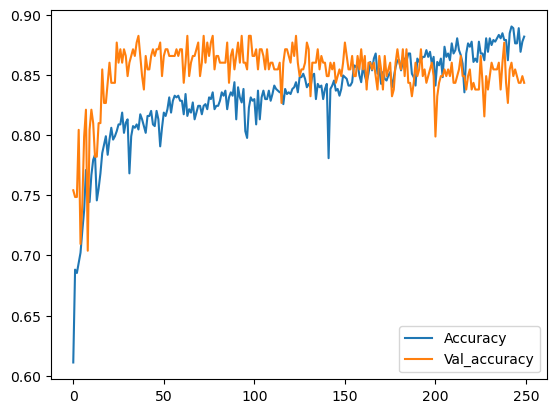

In [298]:
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val_accuracy")
plt.legend()

In [299]:
pred = model.predict(test).flatten()
pred = (pred > 0.5).astype("int64")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [300]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [301]:
df2.shape

(418, 11)

In [302]:
test.shape

(418, 25)

In [304]:
result = pd.DataFrame({'PassengerId': df2['PassengerId'], 'Survived': pred})
result['Survived'] = result['Survived'].astype('int64')

In [305]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [306]:
result.to_csv('titanic_dl_V3.csv', index=False)